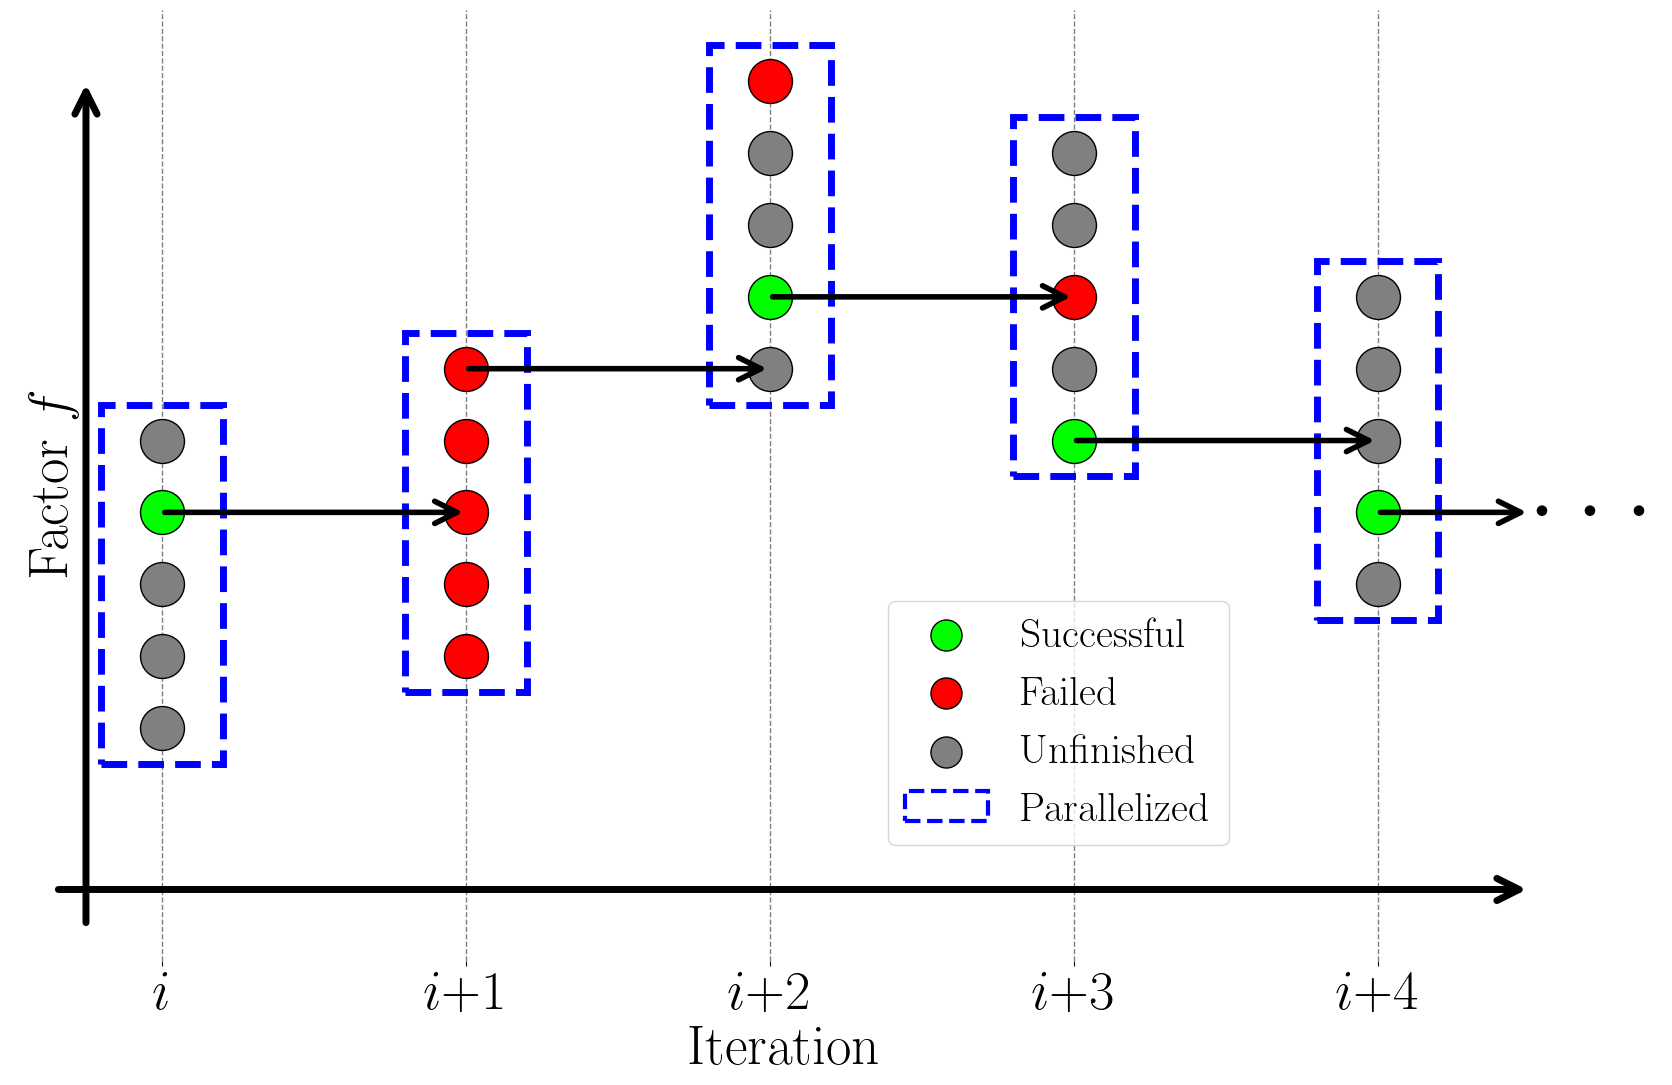

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import matplotlib.patches as mpatches

# Use Times New Roman for all text.
font = font_manager.FontProperties()
font.set_family('serif')
plt.rcParams.update({"text.usetex": True})
plt.rcParams["font.family"] = "Times New Roman"
font.set_size(40)

# Define data for three iterations
iterations = [0, 1, 2, 3, 4]
f_values = {
    0: [1.2, 1.4, 1.6, 1.8, 2.0],
    1: [1.4, 1.6, 1.8, 2.0, 2.2],
    2: [2.2, 2.4, 2.6, 2.8, 3.0],
    3: [2.0, 2.2, 2.4, 2.6, 2.8],
    4: [1.6, 1.8, 2.0, 2.2, 2.4]
}
# For each iteration, the index of the f-value that is selected.
selected_indices = { 
    0: 3,   # f = 1.8 (successful)
    1: 4,   # f = 2.2 (failed)
    2: 1,    # f = 2.4 (successful)
    3: 0,    # f = 2.0 (successful)
    4: 1    # f = 1.8 (successful)
}
# Status for the selected f-value.
selected_status = {
    0: 'success',
    1: 'failed',
    2: 'success',
    3: 'success',
    4: 'success'
}
color_map = {'success': 'lime', 'failed': 'red'}

plt.figure(figsize=(20, 20/1.618))

# Add vertical dashed lines at each iteration.
for i in iterations:
    plt.axvline(x=i, color='black', linestyle='--', lw=1, alpha=0.5)

# Plot each iteration’s points and draw a box around them.
for i in iterations:
    f_list = f_values[i]
    sel_idx = selected_indices[i]
    
    for j, f in enumerate(f_list):

        # if i + 1 iteration, then all the points are red
        if i == 1:
            color = 'red'
        elif j == sel_idx:
            color = color_map[selected_status[i]]
        elif i == 2 and j == 4:
            color = 'red'
        elif i == 3 and j == 2:
            color = 'red'
        else:
            color = 'gray'
        
        size = 1000
        # Plot points with a black edge.
        plt.scatter(i, f, color=color, s=size, edgecolors='black', zorder=3)
    
    # Draw a transparent box around the five points.
    delta = 0.1
    x_box = i - 0.2
    box_width = 0.4
    y_min_box = min(f_list) - delta
    y_max_box = max(f_list) + delta
    box_height = y_max_box - y_min_box
    plt.gca().add_patch(
        plt.Rectangle((x_box, y_min_box), box_width, box_height,
                      fill=False, edgecolor='blue', linestyle='--', alpha=1.0, zorder=2, lw=5)
    )

# Draw arrows connecting the selected points between iterations.
x_start = iterations[0]
x_end = iterations[1]
y_start = f_values[iterations[0]][selected_indices[iterations[0]]]
y_end = f_values[iterations[1]][2]
plt.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                arrowprops=dict(arrowstyle="->", color='black', lw=4, mutation_scale=40))

x_start = iterations[1]
x_end = iterations[2]
y_start = f_values[iterations[1]][-1]
y_end = f_values[iterations[2]][0]
plt.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                arrowprops=dict(arrowstyle="->", color='black', lw=4, mutation_scale=40))

x_start = iterations[2]
x_end = iterations[3]
y_start = f_values[iterations[2]][1]
y_end = f_values[iterations[3]][2]
plt.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                arrowprops=dict(arrowstyle="->", color='black', lw=4, mutation_scale=40))

x_start = iterations[3]
x_end = iterations[4]
y_start = f_values[iterations[3]][0]
y_end = f_values[iterations[4]][2]
plt.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                arrowprops=dict(arrowstyle="->", color='black', lw=4, mutation_scale=40))

x_start = iterations[4]
x_end = iterations[4] + 0.5
y_start = f_values[iterations[4]][selected_indices[iterations[4]]]
y_end = y_start  # Keeping y the same; adjust if you want a vertical offset.

# Draw a dashed line arrow without the pointy head.
plt.annotate("",
             xy=(x_end, y_end), xytext=(x_start, y_start),
             arrowprops=dict(arrowstyle="->", color='black', lw=4, mutation_scale=40))

# Place an ellipsis at the end of the arrow.
plt.text(x_end+.02, y_end+.067, r"$\ldots$", fontsize=80, ha="left", va="center")

# Customize axes: remove grid and hide top/right and also bottom/left spines.
ax = plt.gca()
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Define the axes crossing point.
# We want the axes to cross at (0, 1.2) which is our leftmost x and the minimum f value.
origin = (-0.25, 0.75)
origin_x_axis = (-0.35, 0.75)
origin_y_axis = (-0.25, 0.65)
x_axis_end = max(iterations) + 0.5  # Extend a bit beyond the last iteration.
y_axis_end = max([max(vals) for vals in f_values.values()])  # 3.0

# Draw the x-axis as a horizontal arrow starting at the origin.
plt.annotate("", xy=(x_axis_end, origin[1]), xytext=origin_x_axis,
             arrowprops=dict(arrowstyle="->", lw=5, color="black", mutation_scale=40))
# Draw the y-axis as a vertical arrow starting at the origin.
plt.annotate("", xy=(origin[0], y_axis_end), xytext=origin_y_axis,
             arrowprops=dict(arrowstyle="->", lw=5, color="black", mutation_scale=40))

# Set plot limits to include the arrowheads.
plt.xlim(-0.5, x_axis_end+0.1)
plt.ylim(origin[1]-0.2, y_axis_end+0.2)

# Set x-ticks with labels "i", "i+1", "i+2", "i+3", "i+4"
plt.xticks(iterations, ["$i$", "$i$+1", "$i$+2", "$i$+3", "$i$+4"], fontproperties=font)
# Set y-ticks from 1.2 to 3.0 (with a step of 0.2)
# y_ticks = np.arange(1.2, 3.01, 0.2)
# plt.yticks(y_ticks)
# no ticks on y-axis
plt.yticks([])

# Label the axes and add a title.
plt.xlabel("Iteration", fontproperties=font)
# move the y-axis label slightly to the right
plt.ylabel(r"Factor $f$", fontproperties=font, labelpad=-50)

# Add legend entries via dummy scatter plots.
# Create dummy legend entries via scatter plots.
scatter_success = plt.scatter([], [], color='lime', s=500, edgecolors='black', label='Successful')
scatter_failed = plt.scatter([], [], color='red', s=500, edgecolors='black', label='Failed')
scatter_unfinished = plt.scatter([], [], color='gray', s=500, edgecolors='black', label='Unfinished')

# Create a dummy patch for the blue box (iteration box).
blue_box_legend = mpatches.Patch(edgecolor='blue', facecolor='none', linestyle='--', label='Parallelized', lw=3, alpha=1.0)

# Place the legend in the lower right but slightly to the right.
plt.legend(handles=[scatter_success, scatter_failed, scatter_unfinished, blue_box_legend],
           loc='lower right', fontsize=30, bbox_to_anchor=(0.8, 0.1))

# plt.show()

plt.savefig("/home/kkondo/paper_writing/DYNUS_paper/figures/time_allocation/factor_graph.pdf", bbox_inches='tight', dpi=300)
